# Exercise 1


Screenshot 2024-09-27 at 11.33.20 PM.png

In [3]:
import numpy as np              # for working with arrays
import pandas as pd             # for dataframes
import statsmodels.api as sm    # will use later in the course, can ignore for now
import matplotlib.pyplot as plt # plotting
import random
%config InlineBackend.figure_forgmat = "svg" # so plots look nicer


# Exercise 2

In [ ]:
for i in range(5):
  for j in range(i+1):
    print(j,end='') #changed i to j to get the i+1 printed
  print("")

0
01
012
0123
01234


# Exercise 3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 37.7 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


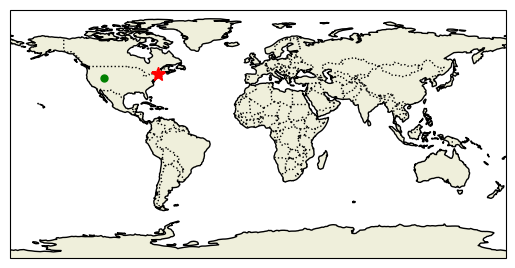

In [ ]:
# prompt: write python code to plot a map
# of the world with Hanover new hampshire indicated by a red star.
!pip install cartopy
import cartopy
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a map with Plate Carrée projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines and land features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND)

# Set the map extent (latitude and longitude boundaries)
ax.set_extent([-180, 180, -90, 90])

# Add country borders
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Coordinates for Hanover, New Hampshire
hanover_lon = -72.2896
hanover_lat = 43.7022

#salt lake city longitude
slc_lon = -111.89
#salt lake city latitude
slc_lat = 40.79



# Plot a red star for Hanover and green dot for SLC
plt.plot(hanover_lon, hanover_lat, marker='*', color='red', markersize=10, transform=ccrs.Geodetic())
plt.plot(slc_lon, slc_lat, marker='.', color='green', markersize=10, transform=ccrs.Geodetic())


plt.show()


# Exercise 3 Explanation

All the data was stored into ax after being loaded by add_feature function from matplotlib. The information about the geometric shape of each country is stored in cfeature from the cartcopy package. This information can be printed but it is all in a raw shapefile format. In terms of data that is not used here, there is no code determining the resolution of the map

The information about location of Hanover, is stored in the variables hanover_lat and hanover_lon

# Exercise 4

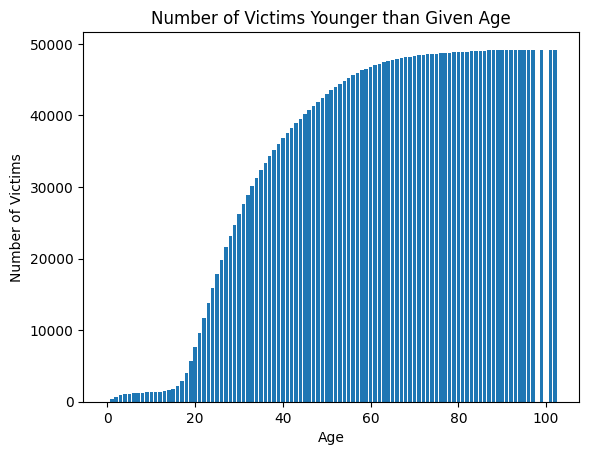

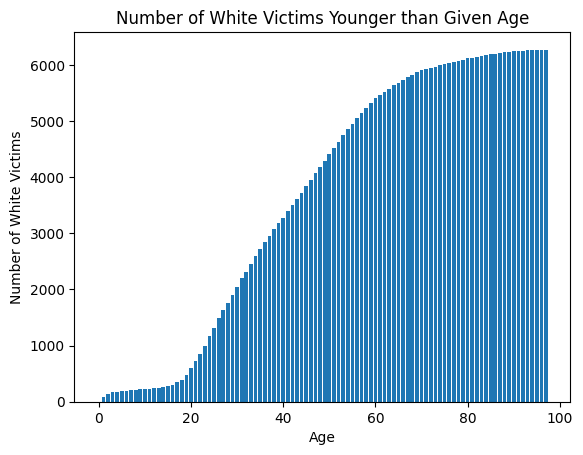

Text(0.5, 1.0, 'Number of Non-White Victims Younger than Given Age')

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/washingtonpost/data-homicides/master/homicide-data.csv",encoding = "ISO-8859-1")
data["victim_age"] = pd.to_numeric(data["victim_age"],errors="coerce")

# if you prefer to work with this data as numpy array you can use the following
# column 0 is age
# column 1 is race

data_array = np.array(data[["victim_age","victim_race"]])


#part a
age_counts = {}
for age in data['victim_age'].unique():
  count = len(data[data['victim_age']< age])

  age_counts[age]=count

#part b

#plot of number of victims and age
plt.bar(age_counts.keys(), age_counts.values())
plt.xlabel('Age')
plt.ylabel('Number of Victims')
plt.title('Number of Victims Younger than Given Age')
plt.show()

#part c

#divide into groups of white and non white victims
white_victims = data[data['victim_race'] == 'White']
non_white_victims = data[data['victim_race'] != 'White']

#repeat part a
white_age_counts = {}
for age in white_victims['victim_age'].unique():
  count = len(white_victims[white_victims['victim_age']<age])
  white_age_counts[age]=count


#make plot from above part
plt.bar(white_age_counts.keys(), white_age_counts.values())
plt.xlabel('Age')
plt.ylabel('Number of White Victims')
plt.title('Number of White Victims Younger than Given Age')
plt.show()


nonwhite_age_counts = {}
for age in non_white_victims['victim_age'].unique():
  count = len(non_white_victims[non_white_victims['victim_age']<age])
  nonwhite_age_counts[age]=count


plt.bar(nonwhite_age_counts.keys(), nonwhite_age_counts.values())
plt.xlabel('Age')
plt.ylabel('Number of Non-White Victims')
plt.title('Number of Non-White Victims Younger than Given Age')



# Exercise 4 write up

Part b: Yes I would expect for the number of people under a certain age to increase with higher ages, I was not originally anticipating the curve but it makes sense as it would not make sense for deaths to be directly linear. People will die at younger ages at scale in a large population

Part c: From the graphs, we see that non-white victims are killed at younger ages because there is a steeper curve in the nonwhite bar graph as compared to the white


# Exercise 5

In [ ]:
def flip_until_two():
  num_heads = 0
  total_flips = 0
  while num_heads <2:
    y = np.random.choice([0,1])
    if y == 0:
      num_heads = 0
    else:
      num_heads = num_heads + 1
    total_flips = total_flips + 1
  return total_flips

# part a
def rolluntil(n):
  #create random integer
  num_ones = 0
  total_rolls = 0
  while num_ones <n:
    y = np.random.choice([1,2,3,4,5,6])
    if y == 1:
      num_ones  += 1
    else:
      num_ones = 0
    total_rolls += 1
  return total_rolls

Rn = rolluntil(3)

Rn

#part b
num_ones = range(1,7)

# run the rolluntil function 100 times for n in range of values of 1-6
data = {n: [rolluntil(n) for x in range(100)] for n in num_ones}
df = pd.DataFrame(data)

#plot comparing the maximum and minimum values of Rn as a function of n

maxes= df.max()
mins = df.min()

plt.plot(num_ones, maxes, label='Maximum Value')
plt.plot(num_ones, mins, label='Minimum Value')
plt.xlabel('n')
plt.ylabel('Rn')
plt.title('Maximum and Minimum Values of Rn as a Function of n')
plt.legend()
plt.show()




#Exercise 5 Writeup

I notice that the maximum values increase faster than the minimum and this is because as we roll the die, the likely hood we get n ones in a row decreases expontentially (1/6)^n. as n increases, it'll become exponentially harder to get n number of ones so it will take more rolls (Rn)

#Exercise 6 part a and b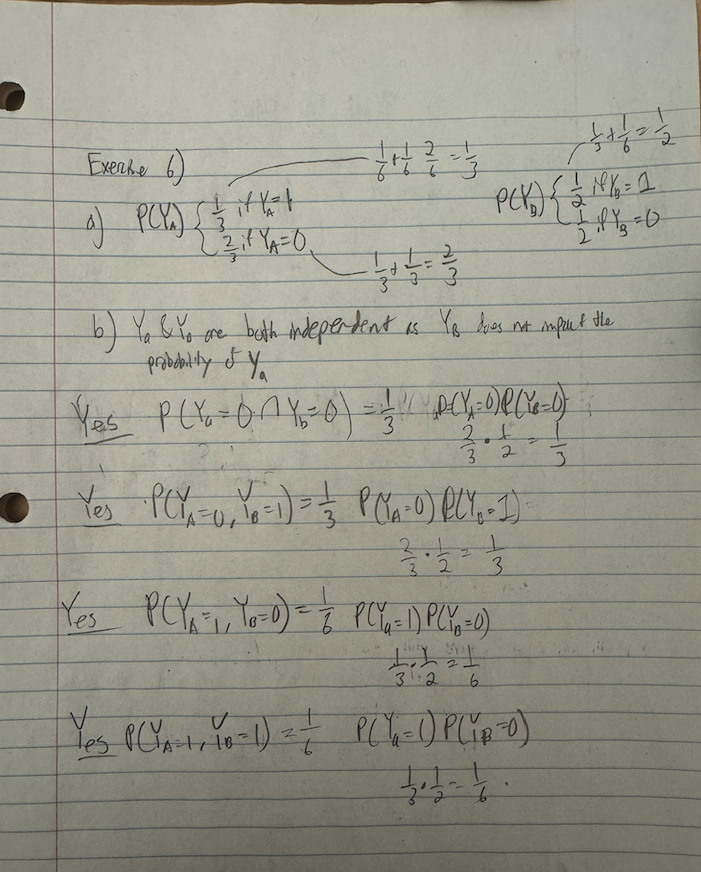

# Exercise 6 part c


In [ ]:
#prompt from Gemini

# prompt 1: P(YA, YB ) =
# 1/3 if YA = 0 and YB = 0
# 1/3 if YA = 0 and YB = 1
# 1/6 if YA = 1 and YB = 0
# 1/6 if YA = 1 and YB = 1
# crate simulations to verify that Ya and Yb are indeed independent


import numpy as np

def simulate_ya_yb(num_simulations):
  """
  Simulates the joint distribution of Ya and Yb.

  Args:
    num_simulations: The number of simulations to run.

  Returns:
    A list of tuples, where each tuple represents a sample of (Ya, Yb).
  """
  ya_yb_samples = []
  for _ in range(num_simulations):
    random_value = np.random.rand()
    if random_value < 1/3:
      ya_yb_samples.append((0, 0))
    elif random_value < 2/3:
      ya_yb_samples.append((0, 1))
    elif random_value < 5/6:
      ya_yb_samples.append((1, 0))
    else:
      ya_yb_samples.append((1, 1))
  return ya_yb_samples

def calculate_probabilities(samples):
  """
  Calculates the probabilities of Ya and Yb.

  Args:
    samples: A list of tuples, where each tuple represents a sample of (Ya, Yb).

  Returns:
    A dictionary containing the probabilities of P(Ya=0), P(Ya=1), P(Yb=0), P(Yb=1).
  """
  num_samples = len(samples)
  p_ya_0 = sum(1 for ya, _ in samples if ya == 0) / num_samples
  p_ya_1 = sum(1 for ya, _ in samples if ya == 1) / num_samples
  p_yb_0 = sum(1 for _, yb in samples if yb == 0) / num_samples
  p_yb_1 = sum(1 for _, yb in samples if yb == 1) / num_samples

  return {"P(Ya=0)": p_ya_0, "P(Ya=1)": p_ya_1, "P(Yb=0)": p_yb_0, "P(Yb=1)": p_yb_1}


def calculate_joint_probabilities(samples):
  """
  Calculates the joint probabilities of Ya and Yb.

  Args:
    samples: A list of tuples, where each tuple represents a sample of (Ya, Yb).

  Returns:
    A dictionary containing the joint probabilities of P(Ya=0, Yb=0), P(Ya=0, Yb=1), P(Ya=1, Yb=0), P(Ya=1, Yb=1).
  """
  num_samples = len(samples)
  p_ya_0_yb_0 = sum(1 for ya, yb in samples if ya == 0 and yb == 0) / num_samples
  p_ya_0_yb_1 = sum(1 for ya, yb in samples if ya == 0 and yb == 1) / num_samples
  p_ya_1_yb_0 = sum(1 for ya, yb in samples if ya == 1 and yb == 0) / num_samples
  p_ya_1_yb_1 = sum(1 for ya, yb in samples if ya == 1 and yb == 1) / num_samples
  return {"P(Ya=0, Yb=0)": p_ya_0_yb_0, "P(Ya=0, Yb=1)": p_ya_0_yb_1, "P(Ya=1, Yb=0)": p_ya_1_yb_0, "P(Ya=1, Yb=1)": p_ya_1_yb_1}


# Run simulations
num_simulations = 10000
ya_yb_samples = simulate_ya_yb(num_simulations)

# Calculate probabilities
probabilities = calculate_probabilities(ya_yb_samples)
joint_probabilities = calculate_joint_probabilities(ya_yb_samples)

# Print results
print("Probabilities:")
for key, value in probabilities.items():
  print(f"{key}: {value:.3f}")
print("\nJoint Probabilities:")
for key, value in joint_probabilities.items():
  print(f"{key}: {value:.3f}")

# Check for independence: P(Ya, Yb) = P(Ya) * P(Yb)
print("\nChecking for Independence:")
print(f"P(Ya=0, Yb=0) ≈ P(Ya=0) * P(Yb=0): {joint_probabilities['P(Ya=0, Yb=0)']:.3f} ≈ {probabilities['P(Ya=0)'] * probabilities['P(Yb=0)']:.3f}")
print(f"P(Ya=0, Yb=1) ≈ P(Ya=0) * P(Yb=1): {joint_probabilities['P(Ya=0, Yb=1)']:.3f} ≈ {probabilities['P(Ya=0)'] * probabilities['P(Yb=1)']:.3f}")
print(f"P(Ya=1, Yb=0) ≈ P(Ya=1) * P(Yb=0): {joint_probabilities['P(Ya=1, Yb=0)']:.3f} ≈ {probabilities['P(Ya=1)'] * probabilities['P(Yb=0)']:.3f}")
print(f"P(Ya=1, Yb=1) ≈ P(Ya=1) * P(Yb=1): {joint_probabilities['P(Ya=1, Yb=1)']:.3f} ≈ {probabilities['P(Ya=1)'] * probabilities['P(Yb=1)']:.3f}")

#Prompt from Gemini
#prompt 2: will there be slight error in the simulation.

#Explanation: the simulations produce very similar join probabiltiies with the product of marginal probabilities, suggesting that Ya and Yb are independent


Probabilities:
P(Ya=0): 0.666
P(Ya=1): 0.334
P(Yb=0): 0.496
P(Yb=1): 0.504

Joint Probabilities:
P(Ya=0, Yb=0): 0.332
P(Ya=0, Yb=1): 0.335
P(Ya=1, Yb=0): 0.164
P(Ya=1, Yb=1): 0.170

Checking for Independence:
P(Ya=0, Yb=0) ≈ P(Ya=0) * P(Yb=0): 0.332 ≈ 0.330
P(Ya=0, Yb=1) ≈ P(Ya=0) * P(Yb=1): 0.335 ≈ 0.336
P(Ya=1, Yb=0) ≈ P(Ya=1) * P(Yb=0): 0.164 ≈ 0.165
P(Ya=1, Yb=1) ≈ P(Ya=1) * P(Yb=1): 0.170 ≈ 0.168


#Exercise 6 Explanation
The simulations produce very similar joint probabiltiies with the product of marginal probabilities, suggesting that Ya and Yb are independent


#Exercise 7

In [5]:
# generate 1000 samples either 0 and 1
qrange=np.random.randint(0,2,10000)

var= qrange *(1-qrange)

var
#unsure of what to do here

#Exercise 8



#Exercise 8 part a

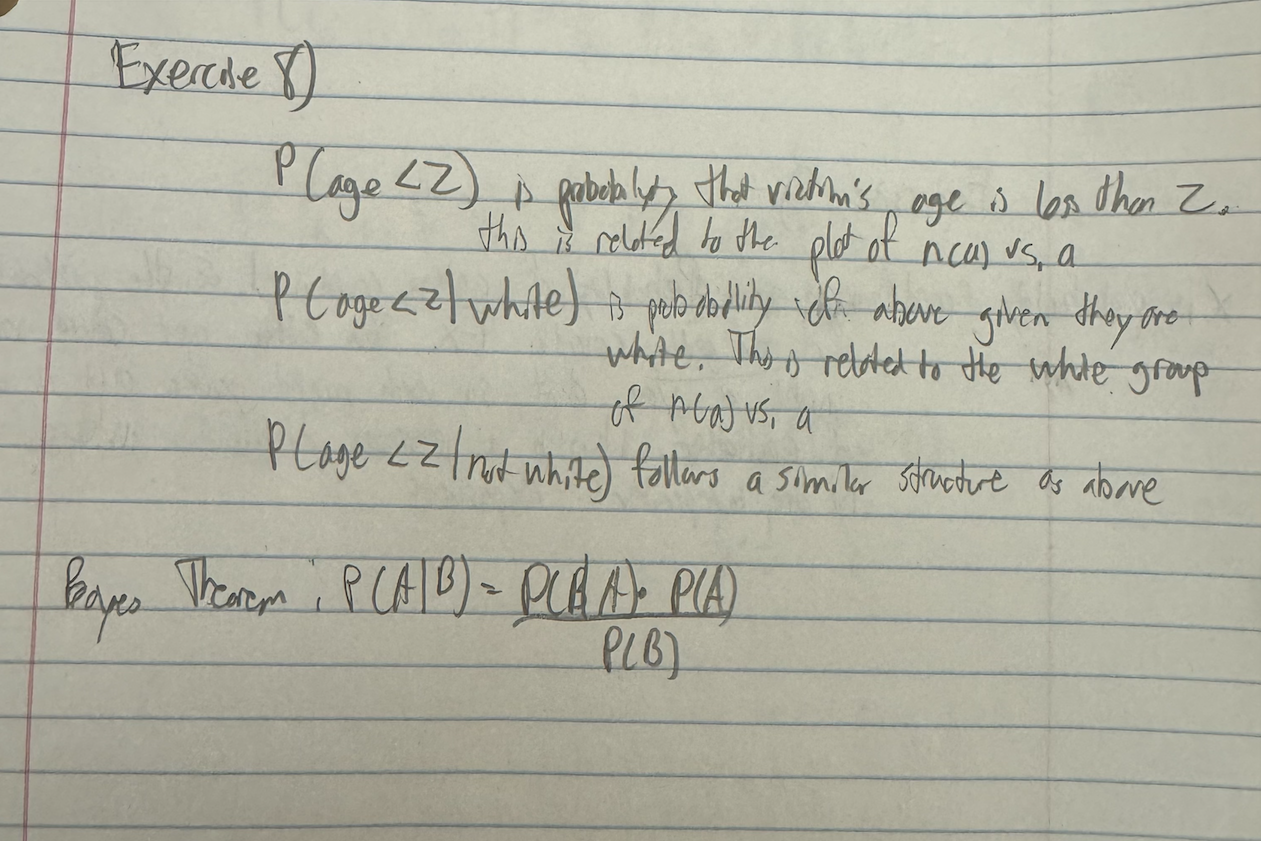

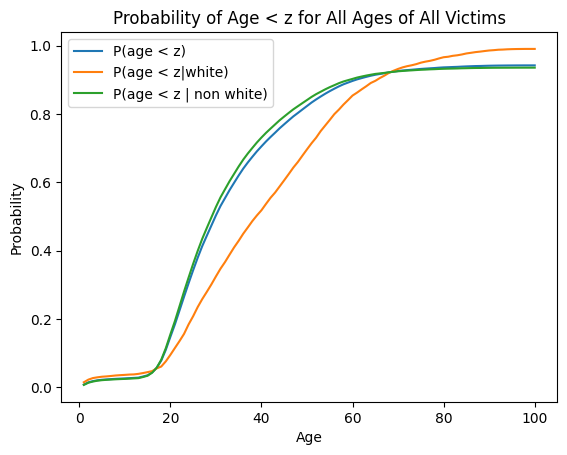

In [ ]:
from functools import total_ordering
data = pd.read_csv("https://raw.githubusercontent.com/washingtonpost/data-homicides/master/homicide-data.csv",encoding = "ISO-8859-1")
data["victim_age"] = pd.to_numeric(data["victim_age"],errors="coerce")

# if you prefer to work with this data as numpy array you can use the following
# column 0 is age
# column 1 is race
data_array = np.array(data[["victim_age","victim_race"]])


#plot the probability of age <z for all ages of all victims
age_probabilities = {}
for age in range(1,101):  #from the age range
    count = len(data[data['victim_age'] < age])
    age_probabilities[age] = count / len(data) #convert this to a probability

plt.plot(age_probabilities.keys(), age_probabilities.values(), label='P(age < z)')

#copied above but switched for white victims
white_victims = data[data['victim_race'] == 'White']
white_age_probabilities = {}
for age in range(1,101):  #from the age range
    count = len(white_victims[white_victims['victim_age'] < age])
    white_age_probabilities[age] = count / len(white_victims) #convert this to a probability

plt.plot(white_age_probabilities.keys(), white_age_probabilities.values(),label='P(age < z|white)')

# non-white victims
nonwhite_victims = data[data['victim_race'] != 'White']
nonwhite_victims_probabilities = {}
for age in range(1,101):  #from the age range
    count = len(nonwhite_victims[nonwhite_victims['victim_age'] < age])
    nonwhite_victims_probabilities[age] = count / len(non_white_victims) #convert this to a probability

plt.plot(nonwhite_victims_probabilities.keys(), nonwhite_victims_probabilities.values(),label='P(age < z | non white)')

#add legend
plt.legend()
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Probability of Age < z for All Ages of All Victims')
plt.show()




#Exercise 8 part b explanation

The differences between these plots and the ones in question 4 is that this graph is shows a continuous line demonstrating probability where the plots in 4 showed the cumulitive number of victims under a certain age

Based off of these plots, i believe that age and race are not independent because there are substantial differences of the probability of white victims being younger than age z. This suggest that race has an impact on the age of a victim of homocide (a nonwhite person is more likely to die at younger age z and than a white person)

#Exercsise 8 part c


In [ ]:
#from data get ages just between 10 and 60

#filter data for white victims

white = data[data['victim_race'] == "White"]

#probabiltiy being white
prob_white = len(white)/len(data)

#calculate white probability of white people between 10 and 60
prob_white_in_range = len(white[(white['victim_age'] > 10) & (white['victim_age'] < 60)]) / len(white)

#probability being 10 to 60
prob_in_range = len(data[(data['victim_age'] > 10) & (data['victim_age'] < 60)]) / len(data)

#use bayes rules

bayes_result = (prob_white_in_range * prob_white) /prob_in_range

bayes_result

0.11392600092443819

# Exercise 9

In [ ]:
#part a

def sim_covid(N):
  got_covid = 0
  for k in range(N):

    # first need to make probability of whether someone has covid (10%) then need probability that you will catch it from them (50%)
      got_covid_interaction = np.random.choice([0, 1], p=[0.5, 0.5]) if np.random.choice([0, 1], p=[0.9, 0.1]) == 1 else 0
      if got_covid_interaction ==1:
        got_covid =1
  return got_covid

sim_covid(10)

#part c


x = 0.05  #probability of contracting covid
interactions = range(1,101) # number of interactions
num_simulations = 100  # umber of simulations

#monte carlo simulation
def monte_carlo_covid_vs_n(interactions, x, num_simulations):
    probabilities = []
    for N in interactions:
        #covid simulation
        res = [sim_covid(N) for x in range (num_simulations)]
        #store probabilities
        prob = np.mean(res)
        probabilities.append(np.mean(prob))
    return probabilities

#run the monte carlo simulation
monte_carlo_probabilities = monte_carlo_covid_vs_n(interactions, x, num_simulations)
# run the modeled probability formula
theoretical_probabilities = [1 - (1 - x)**N for N in interactions]

#create the plots with different visuals
plt.plot(interactions, monte_carlo_probabilities, label='Monte Carlo Simulation', linestyle='--')
plt.plot(interactions, theoretical_probabilities, label='Theoretical', linestyle='-')


#Exercise 9 part b

ex 9.png